# 今週の課題：モンテカルロ法による円周率の計算

ある計算問題を解くときに，確定的な数値計算を使わずに，確率（乱数）を用いて解くことをモンテカルロ法と呼ぶ．
本課題では，モンテカルロ法を用いて円周率の推定値を求める．

- まず，0～1 の一様乱数を2つ発生させ，1つめを$x$座標，2つめを$y$座標とみなすと，座標点$(x, y)$をランダムに生成できる．
- 同様の操作を繰り返して，ランダムな座標点$(x_i , y_i)$を$I$個発生させると，各座標は一様乱数であるから，下図のように，座標点は`1:1`の正方形の中に均一にばらまかれる．

![乱数で作った座標点のプロット](https://docs.google.com/uc?export=download&id=1swzdSMO2uqjR8oKMVI2Qi4qbQ8xx78vq)

- このとき，正方形の面積と 1/4 円の面積の比は，それぞれにばらまかれた座標点数に比例すると期待できる．
- すなわち，1/4 円の中にばらまかれた座標点数を$a$，円外にばらまかれた座標点数を$b$とすると，次の関係から，円周率の近似値$\pi$が推定できる．

$$
\frac{\bar{\pi}}{\pi}:1 = a:a+b  \quad
\therefore \pi \approx \bar{\pi}=\frac{4a}{a + b} = \frac{4a}{I}
$$

# 手順1：直角三角形の面積を推定するサンプルプログラムを理解しよう

以下に示すのは，底辺の長さが 1，高さが 1 の直角三角形の面積を推定するコードである．まず，こちらのコードを実行して，結果を理解しよう．

In [1]:
# 必要なライブラリを読み込む
from matplotlib import pyplot as plt # グラフ描写に用いるpyplotというライブラリを読み込む
import numpy as np
# np.random.seed(1) #　別の値にすると乱数の系列が変わる

In [2]:
# サンプル関数
def estimate_trig():
    I = 10**3 # 座標点の総数
    ereas = np.zeros(I)
    a = 0 # 直角三角形の中の座標点数
    for i in range(1, I):
        x = np.random.uniform() # [0,1]の一様乱数
        y = np.random.uniform() # [0,1]の一様乱数
        if y > x:
            a = a + 1
        ereas[i] = a / i # 面積の推定値
    return ereas

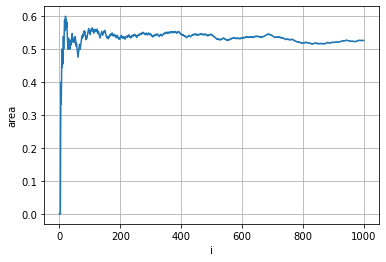

In [3]:
# 実行結果のplot
ereas = estimate_trig()
plt.plot(ereas)
plt.xlabel('i')
plt.ylabel('area')
plt.grid()

# 手順2：上のサンプルプログラムを改造して円周率を求めるプログラムを作成しよう

以下のセルに作成したサンプルプログラムと実行結果を書け．

In [4]:
# 関数の作成
def estimate_pi():
    I = 10**3 # 座標点の総数
    pis = np.zeros(I)
    a = 0 # 円の中の座標点数
    for i in range(1, I):
        x = np.random.uniform() # [0,1]の一様乱数
        y = np.random.uniform() # [0,1]の一様乱数
        if x**2 + y**2 <= 1:
            a = a + 1
        pis[i] = 4*a / i # piの推定値
    return pis

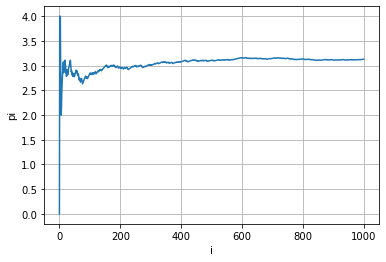

In [5]:
# 実行結果のplot
pis = estimate_pi()
plt.plot(pis)
plt.xlabel('i')
plt.ylabel('pi')
plt.grid()